<a href="https://colab.research.google.com/github/Kshitij04Poojary/Synapse_LP/blob/Week4/Copy_of_SynapseLP_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
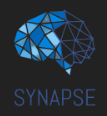

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [ ]:
#write code here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#write code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv("/content/drive/MyDrive/Synapse/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Synapse/test.csv")

### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [ ]:
# try researching about regex
df=df_train
df['Name'] #printing the names

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
#extracting the title
import re
expression=' ([A-Za-z]+)\.'
df['Title']=df['Name'].str.extract(expression)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [ ]:
#write code here
df.drop(columns=['PassengerId','Ticket','Name'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [ ]:
#write code here
nan1=((df.isna().mean())*100).round(2)
df1=pd.DataFrame({'NAN Percentage':nan1})
df1

,NAN Percentage
Survived,0.00
Pclass,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Fare,0.00
Cabin,77.10
Embarked,0.22
Title,0.00


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [ ]:
#write code here
df.drop(columns=['Cabin'],inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)

### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [ ]:
#write code here
df['Family_members']=df['SibSp']+df['Parch']

In [ ]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Age','Fare','Family_members']]=scaler.fit_transform(df[['Age', 'Fare', 'Family_members']])

In [ ]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
df=pd.get_dummies(df,columns=['Pclass','Sex','Title','Embarked'])
df.head()

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,1,0,0.139136,0.1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0,0,0.015469,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,1,0,0.103644,0.1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [ ]:
#write code here
y=df['Survived']
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


<b>remove the y_label (survived) from the dataframe</b>

In [ ]:
#write code here
X=df.drop(['Survived'],axis=1)
X.head()

,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,1,0,0.014151,0.1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0.472229,1,0,0.139136,0.1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0.321438,0,0,0.015469,0.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.434531,1,0,0.103644,0.1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0.434531,0,0,0.015713,0.0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [ ]:
#write code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [ ]:
#write code here
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

<b>Print the Model Accuracy</b>

In [ ]:
#write code here
from sklearn.metrics import accuracy_score
y_pred=dt.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy :{accuracy * 100:.2f}%")

Model Accuracy :76.87%


## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:

Loan Approval:A bank receives loan applications from customers, and they need to decide whether to approve or reject each application. The bank has historical data about previous loan applications, including information about applicants' income, credit score, employment status, loan amount etc
The Decision Tree Classifier will learn from historical data and create a tree-like structure with decision nodes and leaf nodes. When a new loan application is submitted, the model can traverse the tree, making decisions at each node based on the applicant's attributes, and eventually, it will reach a leaf node that indicates whether the application should be approved or rejected.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

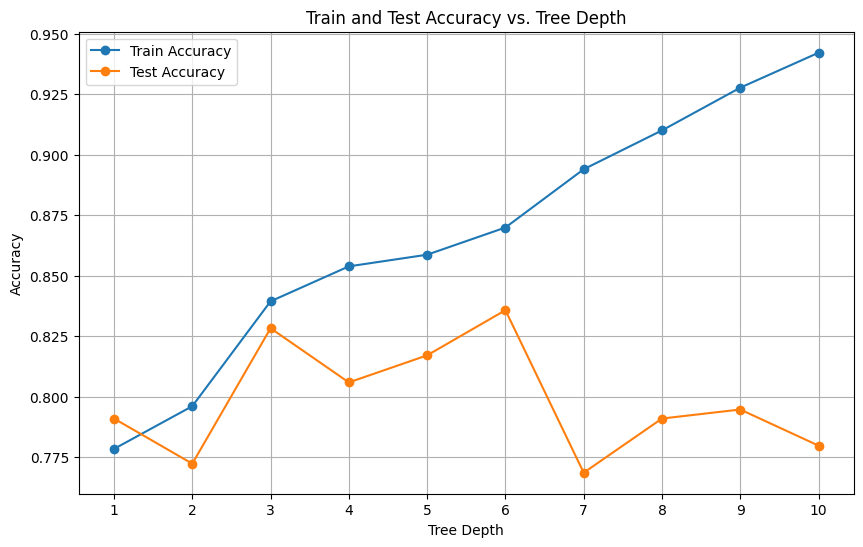

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracy=[]
test_accuracy=[]
depths=list(range(1,11))

for depth in depths:
  clf=DecisionTreeClassifier(max_depth=depth)
  clf.fit(X_train,y_train)

  y_train_pred=clf.predict(X_train)
  train_accuracy.append(accuracy_score(y_train,y_train_pred))

  y_test_pred=clf.predict(X_test)
  test_accuracy.append(accuracy_score(y_test,y_test_pred))

plt.figure(figsize=(10,6))
plt.plot(depths, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(depths, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Train and Test Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

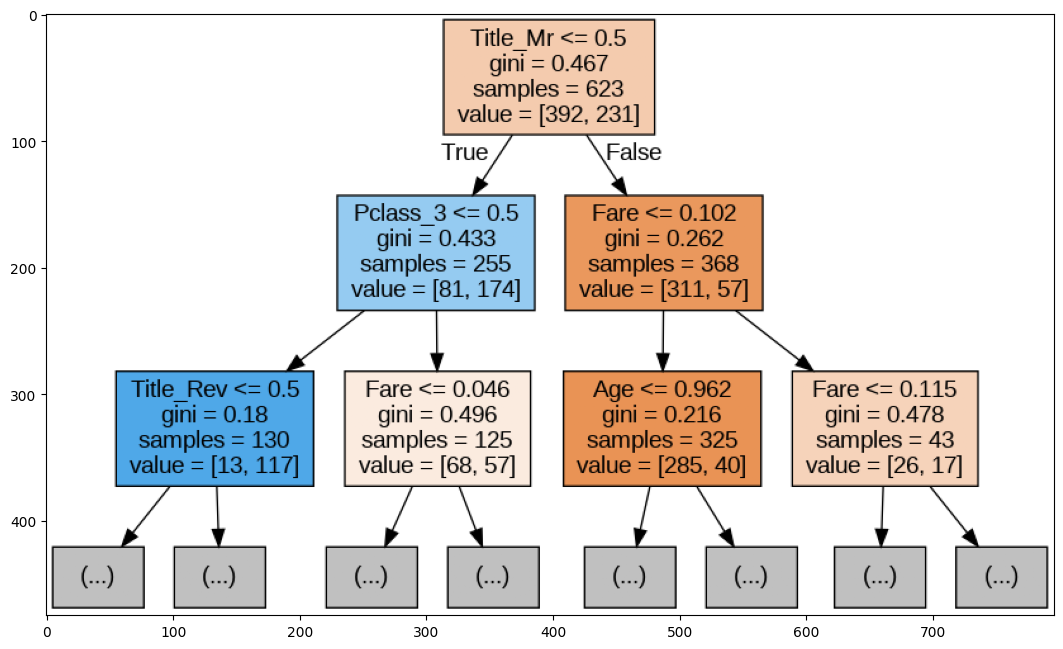

In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(13,13))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here
from sklearn.metrics import accuracy_score
dt2=DecisionTreeClassifier(max_depth=6,random_state=42)
dt2.fit(X_train,y_train)

y_pred=dt2.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Test Accuracy :{accuracy * 100:.2f}%")

y_pred2=dt2.predict(X_train)
accuracy2=accuracy_score(y_train,y_pred2)
print(f"Train Accuracy :{accuracy2 * 100:.2f}%")

Test Accuracy :83.21%
Train Accuracy :87.00%


## Explain: What is your understanding of the charts you made above?

Ans:
Using the graph plotted for train test accuracy,i found out the value of max_depth for which the accuracy was the best. On substituting its value while fitting the model, I improved the accuracy by a large margin from 76.87%   to 83.21%

For the decision tree image: The visualization allows us to see the structure of the tree, which features are used for splitting, and how the data is partitioned at each node. Analyzing the tree structure can provide insights into the decision-making process of the model and help understand which features are important in making predictions.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import GaussianNB,MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
acc=model.score(X_test,y_test)
print(f"Model Accuracy :{acc * 100:.2f}%")


Model Accuracy :80.22%


## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:

1) Decision trees do not make strong assumptions about the data. They are capable of handling both categorical and continuous features and can capture complex, non-linear relationships in the data. Naive Bayes assumes that features are conditionally independent given the class (hence it is called naive). This assumption is often not met in practice.

2) Decision trees can become complex and prone to overfitting when the tree is deep and captures noise in the data. Techniques like pruning are used to prevent overfitting. On the other hand, Naive Bayes is a relatively simple and lightweight algorithm. It's less prone to overfitting.

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#write code here
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
s1=rf.score(X_test,y_test)
print(s1)

0.7910447761194029


In [ ]:
#write code here
param_grid1={
    'n_estimators':[10,20,30,40,50],
    'max_features':['auto','sqrt'],
    'max_depth':[1,2,3,4,5,6],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2],
    'bootstrap':[True,False]
}
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid1,cv=3,verbose=2,n_jobs=4)
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=2)

In [ ]:
#write code here
print(rf_grid.best_params_)
print("Accuracy:",rf_grid.score(X_test,y_test))

{'bootstrap': False, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40}
Accuracy: 0.8246268656716418


## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans:

1)Simple Datasets: When the dataset is small and simple, containing few features, a single Decision Tree might be sufficient to achieve high accuracy. In such cases, the added complexity of a Random Forest will not provide significant improvements.

2)Linearly Separable Data: If the data is linearly separable, meaning that a single Decision Tree can draw a straight-line boundary to separate the classes effectively, then both a Decision Tree and a Random Forest could perform similarly.



## Extra - BaggingClassifier

In [ ]:
#write a code to implement BaggingClassifier
from sklearn.ensemble import BaggingClassifier
base_classifier = DecisionTreeClassifier()
bg=BaggingClassifier(base_classifier,random_state=42)
bg.fit(X_train,y_train)
print(bg.score(X_test,y_test))

0.7686567164179104


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:In Random Forest, at each node, only a random subset of features (a subset of the total features) is considered for splitting the node.
This random feature selection adds an extra layer of randomness to the model, which helps in decorrelating the trees and reducing overfitting.
However in Bagging Classifier, all features are considered at each node when growing the tree.It doesn't have the additional feature selection process that Random Forest employs.

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
ada=AdaBoostClassifier()
model2=ada.fit(X_train,y_train)
print(model2.score(X_test,y_test))


0.7985074626865671


In [ ]:
param_grid2={
    'n_estimators':[10,50,100,500],
    'learning_rate':[0.0001,0.001,0.01,0.1,1.0],
    'algorithm':['SAMME','SAMME.R']
}
ada_grid=GridSearchCV(estimator=ada,param_grid=param_grid2,cv=3,n_jobs=-1,scoring='accuracy')
ada_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [ ]:
#write code here
print(ada_grid.best_params_)
print(ada_grid.score(X_test,y_test))

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}
0.8097014925373134


## Explain: What is the difference between Bagging and Boosting?

Ans:

Parallel Ensemble Learning: In Bagging, multiple base models are trained independently and in parallel. Each base model is trained on a random sample (with replacement) of the training data.

Sequential Ensemble Learning: In Boosting, base models are trained sequentially, and each subsequent model focuses on correcting the errors made by the previous ones. The weights of the training samples are adjusted based on the errors.

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [ ]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_scores = []

for i in ccp_alphas:
  prunedtest_model = DecisionTreeClassifier(ccp_alpha=i, max_depth=6, criterion='entropy', splitter='best')
  ccp_scores.append(cross_val_score(prunedtest_model, X_train, y_train, cv=5).mean())

alpha = ccp_alphas[ccp_scores.index(max(ccp_scores))]

pruned_model = DecisionTreeClassifier(ccp_alpha=alpha, max_depth=6, criterion='entropy', splitter='best')
pruned_model.fit(X_train, y_train)

print(f'Train acc: {pruned_model.score(X_train, y_train)}')
print(f'Test acc: {pruned_model.score(X_test, y_test)}')

Train acc: 0.8362760834670947
Test acc: 0.8283582089552238


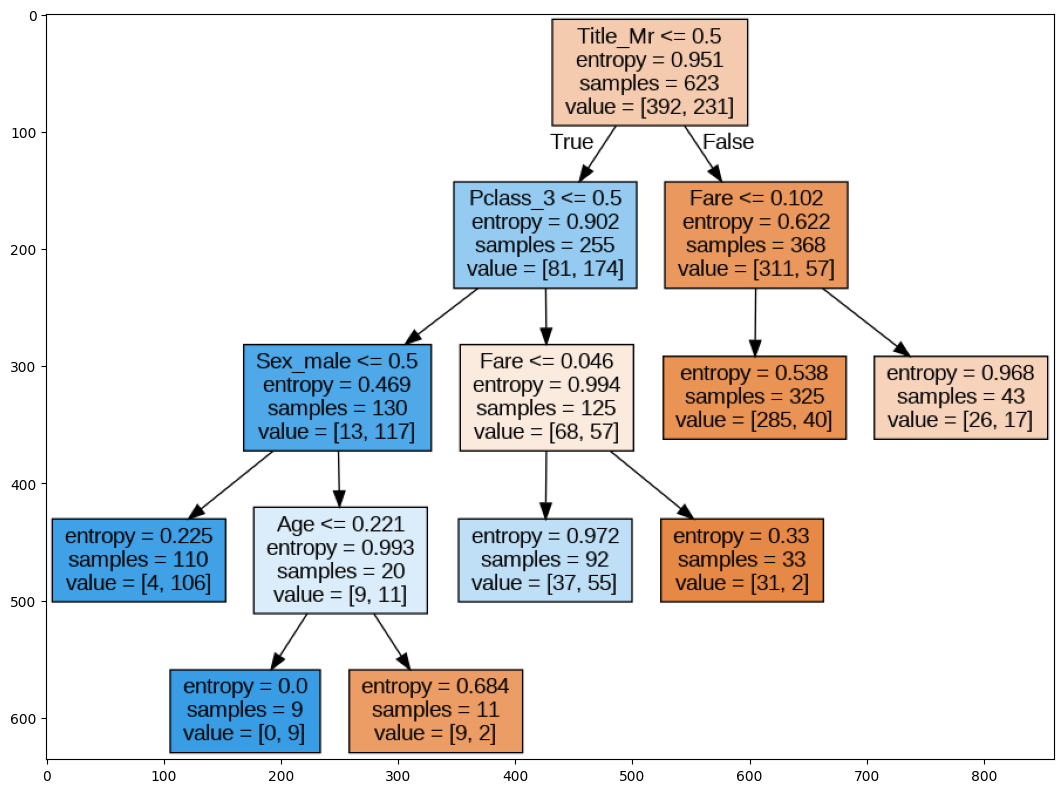

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
from sklearn import tree
import graphviz
from IPython.display import Image

# Export the pruned tree as DOT format
pruned_tree = tree.export_graphviz(pruned_model, out_file='ptree.dot', feature_names=X_train.columns, max_depth=4, filled=True)

!dot -Tpng ptree.dot -o ptree.png # to convert the file
image = plt.imread('ptree.png')
plt.figure(figsize=(13,13))
plt.imshow(image)


<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:The pruning method gives me the best accuracy (82.84%) among all the other methods. Also the accuracy for the training set is 83.63% which means it is not overfitting. Therefore i would choose the pruning model as my optimal model.   I would also like to point out that RandomForestClassifier also gave a close accuracy of 82.46 %.


# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

XGBoost (Extreme Gradient Boosting) is a popular and powerful machine learning library that is primarily used for both classification and regression tasks.It is the execution of gradient boosted decision trees that is designed for high speed and performance.

XGBoost Classifier: XGBoost Classifier is used for classification tasks, where the goal is to predict discrete categorical labels or classes.

XGBoost Regressor is used for regression tasks, where the goal is to predict continuous numeric values, such as prices, temperatures, or any numerical quantity. Some of the feature of XG Boost are:

a) Gradient Boosting: XGBoost uses an ensemble of decision trees, and it's an   advanced form of gradient boosting that combines multiple weak learners to create a strong predictive model.

b) Regularization: It incorporates L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting and improve the model's generalization.

c) Parallel and Distributed Computing: XGBoost is highly efficient and can take advantage of parallel processing to speed up training.

d) Cross-Validation: We use cross-validation by importing the function from sklearn but XGboost is enabled with inbuilt CV function.

# **End of Task**

> ©DJS Synapse 2023 - 2024